##### in statsmodels

In [10]:
from sklearn.datasets import make_classification

In [11]:
x0, y = make_classification(n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=4)
x = sm.add_constant(x0)

In [12]:
from scipy import stats
stats.chisqprob = lambda chisq, df : stats.chi2.sf(chisq, df)

logit_mod = sm.Logit(y,x)
logit_result = logit_mod.fit(disp=0)
print(logit_result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sun, 15 Jul 2018   Pseudo R-squ.:                  0.7679
Time:                        23:20:47   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


In [13]:
y

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0])

y와 y_hat이 정확하게 일치할때, Pseudo R square가 1이 된다.

In [6]:
xx = np.linspace(-3,3,100)
logit_result.predict(sm.add_constant(xx))

array([  3.86616110e-06,   4.99842983e-06,   6.46229989e-06,
         8.35488411e-06,   1.08017348e-05,   1.39651718e-05,
         1.80550481e-05,   2.33426682e-05,   3.01787795e-05,
         3.90168297e-05,   5.04430293e-05,   6.52152087e-05,
         8.43130379e-05,   1.09002927e-04,   1.40921883e-04,
         1.82185857e-04,   2.35529674e-04,   3.04487746e-04,
         3.93627323e-04,   5.08849461e-04,   6.57777095e-04,
         8.50255080e-04,   1.09899381e-03,   1.42039663e-03,
         1.83562157e-03,   2.37194102e-03,   3.06447756e-03,
         3.95841196e-03,   5.11177762e-03,   6.59897391e-03,
         8.51514477e-03,   1.09815711e-02,   1.41522049e-02,
         1.82214084e-02,   2.34328251e-02,   3.00890539e-02,
         3.85613639e-02,   4.92980073e-02,   6.28287015e-02,
         7.97615566e-02,   1.00767271e-01,   1.26544257e-01,
         1.57758362e-01,   1.94953411e-01,   2.38435393e-01,
         2.88144322e-01,   3.43541669e-01,   4.03551714e-01,
         4.66593595e-01,

### predict()는 y=1 일 확률을 의미함. 
- 0.5이상이면 y=1이라고 말하고
- 0.5보다 작으면 y=0이라고 말한다.

In [7]:
y

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0])

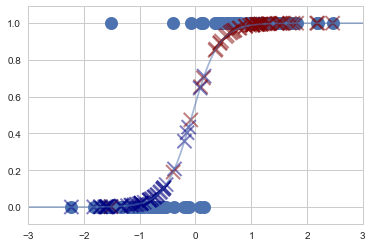

In [14]:
xx = np.linspace(-3,3,100)
theta = logit_result.predict(sm.add_constant(xx))
plt.plot(xx, theta, alpha=0.5)
plt.scatter(x0, y, marker='o',lw=3, s=100)
plt.scatter(x0, logit_result.predict(x), marker='x', c=y, s=200, lw=2 ,alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3,3)
plt.show()

##### in scikit-learn

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression().fit(x0, y) # 자동 augmentation

In [19]:
model.coef_, model.intercept_

(array([[ 2.89901169]]), array([ 0.11534083]))

In [21]:
model.predict(x0)

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0])

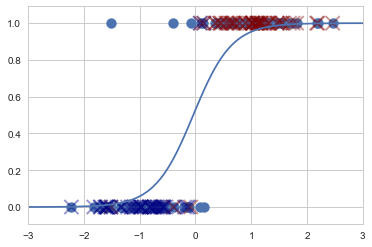

In [26]:
xx = np.linspace(-3,3,100)
theta = 1.0/(1 + np.exp(-model.coef_[0][0] * xx - model.intercept_[0])) # logistic 함수
plt.plot(xx, theta)
plt.scatter(x0, y, marker='o',s=100 )
plt.scatter(x0, model.predict(x0), marker='x', s=200, alpha=0.4 ,lw=2, c=y, cmap=mpl.cm.jet)
plt.xlim(-3,3)
plt.show()

##### 예제 1 : 미슐랭 가이드

In [27]:
df = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/MichelinNY.csv", 
                 encoding="latin1")
df.tail()

,InMichelin,Restaurant Name,Food,Decor,Service,Price
159,0,Terrace in the Sky,23,25,21,62
160,1,Tocqueville,25,21,24,65
161,1,Triomphe,25,22,22,65
162,0,Village,20,20,19,40
163,1,Vong,23,24,21,60


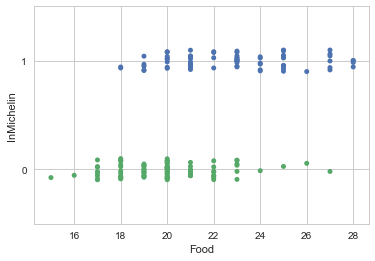

In [33]:
sns.stripplot(x='Food', y='InMichelin',jitter=True,orient='h',order=[1, 0], data=df)
plt.grid(True)
plt.show()

In [36]:
model = sm.Logit.from_formula('InMichelin ~ Food + Decor + Service + Price', data=df)
result = model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             InMichelin   No. Observations:                  164
Model:                          Logit   Df Residuals:                      159
Method:                           MLE   Df Model:                            4
Date:                Sun, 15 Jul 2018   Pseudo R-squ.:                  0.3428
Time:                        17:38:41   Log-Likelihood:                -74.198
converged:                       True   LL-Null:                       -112.89
                                        LLR p-value:                 6.213e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1975      2.309     -4.850      0.000     -15.723      -6.672
Food           0.4048      0.131      3.080      0.002       0.147       0.662
Decor          0.1000      0.089      1.121      0.2

In [37]:
df['prediction'] = result.predict(df)
df.tail()

,InMichelin,Restaurant Name,Food,Decor,Service,Price,prediction
159,0,Terrace in the Sky,23,25,21,62,0.905429
160,1,Tocqueville,25,21,24,65,0.914256
161,1,Triomphe,25,22,22,65,0.945400
162,0,Village,20,20,19,40,0.251933
163,1,Vong,23,24,21,60,0.878216


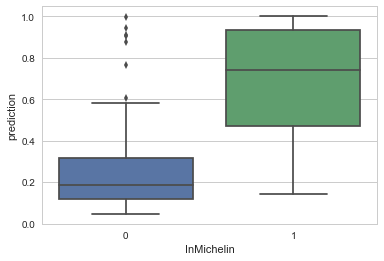

In [38]:
sns.boxplot(x='InMichelin', y='prediction', data=df)
plt.show()

- 0.5를 기준으로 prediction(stats에선 확률로 나옴)이 작은 것들은 class0으로, 
- 큰 것들은 class1로 분류된 것을 볼 수 있음.
- 그렇지 못한 예외의 경우도 존재함.

##### quiz 1
1. 붓꽃 분류 문제에서 클래스가 setosa, versicolor인 데이터만 사용하고 (setosa=0, versicolor=1) 독립변수로는 꽃받침 길이(Sepal Length)와 상수항만 사용하여 StatsModels 패키지의 로지스틱 회귀 모형으로 결과를 예측하고 보고서를 출력한다.

2. 위 결과를 confusion matrix와 classification report로 표현한다.

3. 이 모형에 대해 ROC커브를 그리고 AUC를 구한다. 이 때 Scikit-Learn의 LogisticRegression을 사용하지 않고 위에서 StatsModels로 구한 모형을 사용한다.

In [39]:
from sklearn.datasets import load_iris
iris = load_iris()

In [44]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [53]:
x0 = pd.DataFrame(iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width']) 
y = pd.DataFrame(iris.target, columns=['species'])

In [54]:
df = pd.concat([x0, y], axis=1)
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [55]:
df = df[df['species'] != 2]
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1


In [57]:
model = sm.Logit.from_formula('species ~ sepal_length', data=df)
result = model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sun, 15 Jul 2018   Pseudo R-squ.:                  0.5368
Time:                        17:54:05   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 6.320e-18
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal_length     5.1403      1.007      5.107      0.000       3.168       7.113


In [59]:
df['prediction'] = np.array([1 if i >= 0.5 else 0 for i in result.predict(df)])
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,prediction
95,5.7,3.0,4.2,1.2,1,1
96,5.7,2.9,4.2,1.3,1,1
97,6.2,2.9,4.3,1.3,1,1
98,5.1,2.5,3.0,1.1,1,0
99,5.7,2.8,4.1,1.3,1,1


In [60]:
from sklearn.metrics import confusion_matrix

In [63]:
confusion_matrix(df.species, df.prediction)

array([[45,  5],
       [ 6, 44]], dtype=int64)

In [64]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(df.species, df.prediction, target_names=['setosa','versicolor']))

             precision    recall  f1-score   support

     setosa       0.88      0.90      0.89        50
 versicolor       0.90      0.88      0.89        50

avg / total       0.89      0.89      0.89       100



In [68]:
from sklearn.metrics import roc_curve

In [69]:
fpr, tpr, thresholds = roc_curve(df.species, result.predict(df))

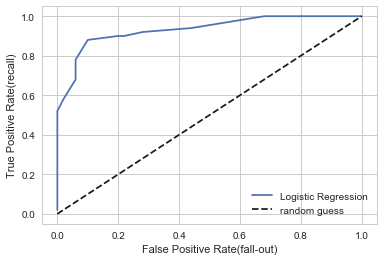

In [72]:
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1],[0,1], 'k--' ,label="random guess")
plt.xlabel("False Positive Rate(fall-out)")
plt.ylabel("True Positive Rate(recall)")
plt.legend()
plt.show()

In [73]:
from sklearn.metrics import auc

In [74]:
auc(fpr, tpr)

0.93259999999999987

##### quiz 2
1. 붓꽃 분류 문제에서 클래스가 versicolor, virginica인 데이터만 사용하여 (versicolor=0, virginica=1) 로지스틱 회귀 모형으로 결과를 예측하고 보고서를 출력한다. 독립 변수는 모두 사용한다.
2. 위 결과를 confusion matrix와 classification report로 표현한다.
3. 이 모형에 대해 ROC커브를 그리고 AUC를 구한다. 이 때 Scikit-Learn의 LogisticRegression을 사용하지 않고 위에서 StatsModels로 구한 모형을 사용한다

In [77]:
x = pd.DataFrame(iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
y = pd.Series(iris.target, dtype='category')
y = y.cat.rename_categories(iris.target_names)

In [79]:
y = pd.DataFrame(y,columns=['species'])

In [83]:
df = pd.concat([x,y], axis=1)
df = df[df['species'] != 'setosa']
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [85]:
dic = {'versicolor':0, 'virginica':1}
df['species_01'] = df['species'].map(dic)
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,species_01
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1
149,5.9,3.0,5.1,1.8,virginica,1


In [86]:
model2 = sm.Logit.from_formula('species_01 ~ sepal_length + sepal_width + petal_length + petal_width', data=df)
result2 = model2.fit(disp=0)
print(result2.summary())

                           Logit Regression Results                           
Dep. Variable:             species_01   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Sun, 15 Jul 2018   Pseudo R-squ.:                  0.9142
Time:                        18:15:50   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 1.947e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal_length    -2.4652      2.394     -1.030      0.303      -7.158       2.228
sepal_width     -6.6809      4.480     -1.49

In [87]:
df['prediction'] = np.array([1 if i >= 0.5 else 0 for i in result.predict(df)])
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,species_01,prediction
145,6.7,3.0,5.2,2.3,virginica,1,1
146,6.3,2.5,5.0,1.9,virginica,1,1
147,6.5,3.0,5.2,2.0,virginica,1,1
148,6.2,3.4,5.4,2.3,virginica,1,1
149,5.9,3.0,5.1,1.8,virginica,1,1


In [88]:
confusion_matrix(df.species_01,df.prediction)

array([[ 6, 44],
       [ 1, 49]], dtype=int64)

In [90]:
print(classification_report(df.species_01,df.prediction, target_names=['versicolor','virginica']))

             precision    recall  f1-score   support

 versicolor       0.86      0.12      0.21        50
  virginica       0.53      0.98      0.69        50

avg / total       0.69      0.55      0.45       100



In [92]:
fpr2, tpr2, thresholds2 = roc_curve(df.species_01, result.predict(df))

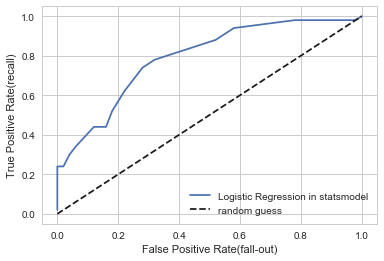

In [94]:
plt.plot(fpr2, tpr2, label="Logistic Regression in statsmodel")
plt.plot([0,1],[0,1], 'k--', label="random guess")
plt.xlabel("False Positive Rate(fall-out)")
plt.ylabel("True Positive Rate(recall)")
plt.legend()
plt.show()

In [95]:
auc(fpr2, tpr2)

0.78959999999999997

##### 예제2 : Michelin and Zagat 가이드 비교
- 종속변수가 0,1값의 베르누이 분포이외에
- 0~1사이의 값을 가지는 종속변수에도 사용가능하다.

In [1]:
df = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/MichelinFood.txt", sep="\t")
df.tail()

,Food,InMichelin,NotInMichelin,mi,proportion
9,24,6,1,7,0.86
10,25,11,1,12,0.92
11,26,1,1,2,0.50
12,27,6,1,7,0.86
13,28,4,0,4,1.00


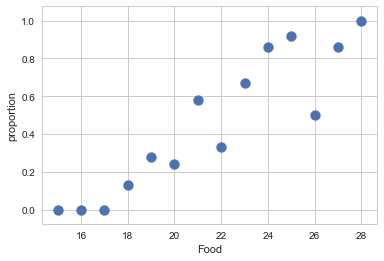

In [3]:
df.plot.scatter(x='Food', y='proportion', s=100)
plt.show()

In [14]:
from scipy import stats
stats.chisqprob = lambda chisq, df : stats.chi2.sf(chisq, df)

x = sm.add_constant(df.Food)
y = df.proportion
model = sm.Logit(y,x)
result = model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             proportion   No. Observations:                   14
Model:                          Logit   Df Residuals:                       12
Method:                           MLE   Df Model:                            1
Date:                Sun, 15 Jul 2018   Pseudo R-squ.:                  0.4832
Time:                        23:21:10   Log-Likelihood:                -4.9712
converged:                       True   LL-Null:                       -9.6189
                                        LLR p-value:                  0.002297
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.3600      5.211     -1.988      0.047     -20.574      -0.146
Food           0.4671      0.235      1.991      0.046       0.007       0.927


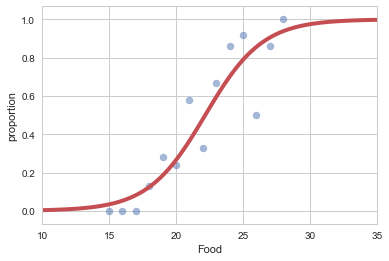

In [17]:
df.plot.scatter(x='Food', y='proportion', s=50, alpha=0.5)
xx = np.linspace(10,35,100)
plt.plot(xx, result.predict(sm.add_constant(xx)), c='r', lw=4)
plt.xlim(10,35)
plt.show()

In [19]:
result.predict(sm.add_constant(xx))

array([ 0.00337112,  0.00379154,  0.00426417,  0.00479543,  0.00539252,
        0.00606351,  0.00681741,  0.00766432,  0.00861553,  0.00968365,
        0.01088273,  0.01222846,  0.01373828,  0.0154316 ,  0.01732997,
        0.01945726,  0.02183987,  0.02450695,  0.02749058,  0.03082597,
        0.03455167,  0.03870968,  0.0433456 ,  0.04850872,  0.05425196,
        0.06063185,  0.06770828,  0.07554419,  0.08420505,  0.09375815,
        0.10427164,  0.1158134 ,  0.1284495 ,  0.1422425 ,  0.15724938,
        0.17351923,  0.19109074,  0.20998954,  0.23022546,  0.25178993,
        0.27465358,  0.29876435,  0.32404612,  0.35039826,  0.37769598,
        0.40579186,  0.43451842,  0.46369165,  0.49311554,  0.52258719,
        0.55190241,  0.5808613 ,  0.60927363,  0.63696371,  0.66377436,
        0.68956998,  0.71423854,  0.73769248,  0.75986862,  0.78072721,
        0.80025025,  0.81843928,  0.83531288,  0.85090399,  0.86525717,
        0.87842601,  0.89047074,  0.90145603,  0.91144911,  0.92